In [3]:
import pandas as pd

df = pd.read_csv('combined_file.csv')

df.sample(10)

,Entity,Label
10,"the recall began november 11, 2019 and all aff...","Corrective action"""
29,national highway traffic safety administration...,"Corrective action"""
67,vehicle will not be able to move under its own...,"Failure Issue"""
81,Entity,Label
44,1-888-327-4236,"Contact"""
4,back-up camera and display settings,"Component"""
62,2016 starcraft quest school buses,"Vehicle model"""
103,protective partition,"Component"""
86,recirculating balls,"Component"""
70,transmission is in 'park',"Component"""


In [6]:
import string

# Convert data types of 'Entity' and 'Label' columns to string
df['Entity'] = df['Entity'].astype(str)
df['Label'] = df['Label'].astype(str)

# Remove punctuation and convert to lowercase for 'Entity' column
df['Entity'] = df['Entity'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)).lower())

# Remove extra inverted commas and strip whitespace for 'Label' column
df['Label'] = df['Label'].apply(lambda x: x.replace('"', '').strip())

In [7]:
df.head()

,Entity,Label
0,nissan north america inc,Company
1,nissan,Company
2,20182019 nissan altima armada frontier kicks l...,Vehicle model
3,2019 nissan gtr and taxi and infiniti qx50 qx6...,Vehicle model
4,backup camera and display settings,Component


In [8]:
# Remove numbers from 'Entity' column and convert to lowercase
df['Entity'] = df['Entity'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]).lower())

# Remove extra inverted commas and strip whitespace for 'Label' column, then convert to lowercase
df['Label'] = df['Label'].apply(lambda x: x.replace('"', '').strip().lower())

In [9]:
df.head()

,Entity,Label
0,nissan north america inc,company
1,nissan,company
2,nissan altima armada frontier kicks leaf maxi...,vehicle model
3,nissan gtr and taxi and infiniti qx qx q ql v...,vehicle model
4,backup camera and display settings,component


In [11]:
max_length = max(len(entity) for entity in df['Entity'])
print("Maximum length of strings in the 'Entity' column:", max_length)

Maximum length of strings in the 'Entity' column: 195


In [14]:
df['Label'].unique()

array(['company', 'vehicle model', 'component', 'failure issue',
       'standard', 'corrective action', 'date', 'contact', 'website',
       'test', 'scenario', 'label', 'unkown'], dtype=object)

In [15]:
label_counts = df['Label'].value_counts()
print("Frequency of each label:")
print(label_counts)

Frequency of each label:
Label
component            24
failure issue        24
corrective action    21
company              10
vehicle model         9
contact               4
standard              3
unkown                3
date                  2
website               2
label                 2
test                  1
scenario              1
Name: count, dtype: int64


In [18]:
# List of labels to remove
labels_to_remove = ['unkown', 'date', 'website', 'label', 'test', 'scenario']

# Filter out rows with labels to remove
df = df[~df['Label'].isin(labels_to_remove)]

In [19]:
label_counts = df['Label'].value_counts()
print("Frequency of each label:")
print(label_counts)

Frequency of each label:
Label
component            24
failure issue        24
corrective action    21
company              10
vehicle model         9
contact               4
standard              3
Name: count, dtype: int64


In [20]:
df.head()

,Entity,Label
0,nissan north america inc,company
1,nissan,company
2,nissan altima armada frontier kicks leaf maxi...,vehicle model
3,nissan gtr and taxi and infiniti qx qx q ql v...,vehicle model
4,backup camera and display settings,component


In [21]:
df.shape

(95, 2)

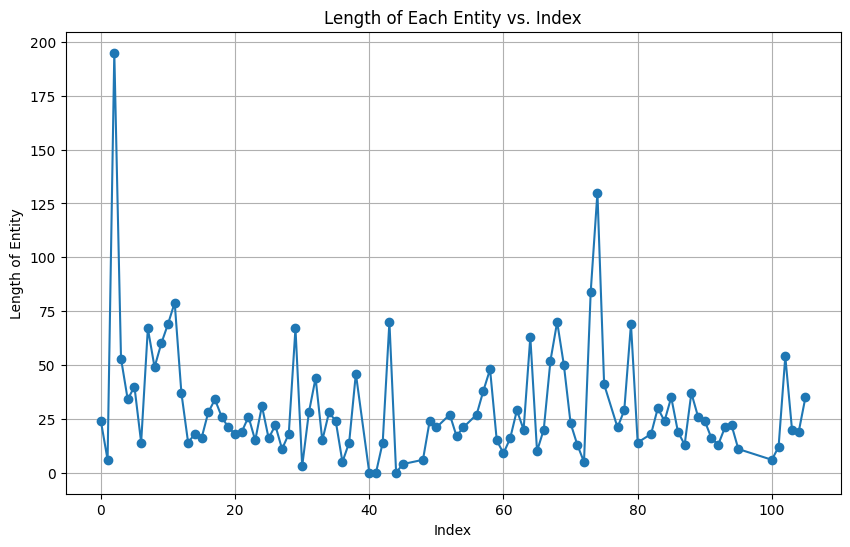

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the length of each entity
entity_lengths = df['Entity'].apply(len)

# Plot the length of each entity against its index
plt.figure(figsize=(10, 6))
plt.plot(entity_lengths.index, entity_lengths, marker='o', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Length of Entity')
plt.title('Length of Each Entity vs. Index')
plt.grid(True)
plt.show()

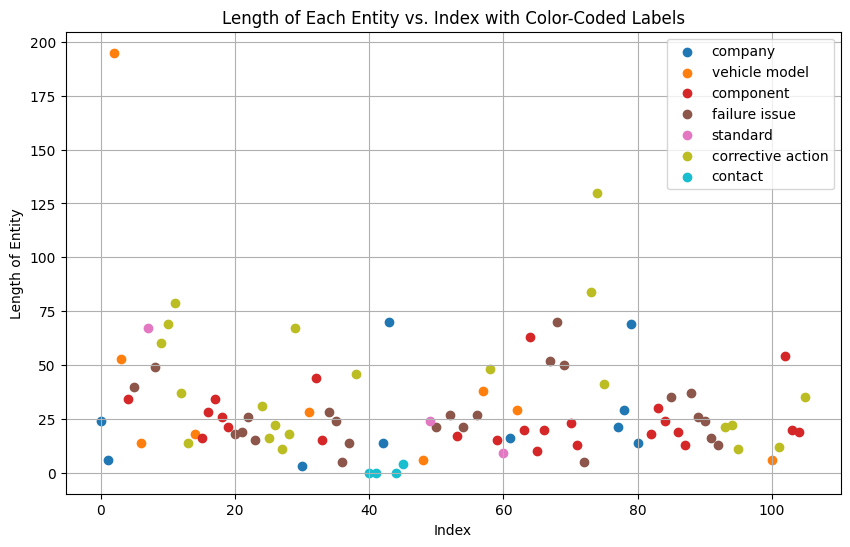

In [29]:
# Calculate the length of each entity
entity_lengths = df['Entity'].apply(len)

# Generate a color map for labels
unique_labels = df['Label'].unique()
label_colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

# Plot the length of each entity against its index
plt.figure(figsize=(10, 6))
for i, label in enumerate(unique_labels):
    label_indices = df[df['Label'] == label].index
    plt.scatter(label_indices, entity_lengths[label_indices], label=label, color=label_colors[i], marker='o')

plt.xlabel('Index')
plt.ylabel('Length of Entity')
plt.title('Length of Each Entity vs. Index with Color-Coded Labels')
plt.grid(True)
plt.legend()
plt.show()


In [67]:
import spacy

# Load English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_sm")

# Step 1: Read data from CSV files
temp_df = pd.read_csv('Processed_Data/final_data.csv')
paragraphs_df = temp_df[:50]
entities_df = df

In [68]:
paragraphs_df.head()

,combined_text
0,mci is recalling certain model year 2002-2009 ...
1,trucks fail to meet requirement of fmvss no. 3...
2,the involved vehicles do not conform to federa...
3,"nissan north america, inc. (nissan) is recalli..."
4,"on certain passenger vehicles, the rear brake ..."


In [69]:
# Preprocess text
paragraphs_df['combined_text'] = paragraphs_df['combined_text'].apply(lambda x: ''.join(char.lower() for char in x if char not in string.punctuation and not char.isdigit()))

In [70]:
paragraphs_df.head()

,combined_text
0,mci is recalling certain model year d series ...
1,trucks fail to meet requirement of fmvss no f...
2,the involved vehicles do not conform to federa...
3,nissan north america inc nissan is recalling c...
4,on certain passenger vehicles the rear brake t...


In [72]:
# Preprocess text
def preprocess_text(text):
    doc = nlp(text)
    processed_text = []
    for token in doc:
        # Complete incomplete words
        if token.is_alpha and not token.is_stop and not token.is_punct:
            processed_text.append(token.lemma_)
    return ' '.join(processed_text)

paragraphs_df['combined_text'] = paragraphs_df['combined_text'].apply(preprocess_text)

In [73]:
paragraphs_df.head()

,combined_text
0,mci recall certain model year d series coach e...
1,truck fail meet requirement fmvss fuel system ...
2,involved vehicle conform federal motor vehicle...
3,nissan north america inc nissan recall certain...
4,certain passenger vehicle rear brake tube pass...


In [61]:
entities_df.head()

,Entity,Label
0,nissan north america inc,company
1,nissan,company
2,nissan altima armada frontier kicks leaf maxi...,vehicle model
3,nissan gtr and taxi and infiniti qx qx q ql v...,vehicle model
4,backup camera and display settings,component


In [77]:
# Label Assignment 
def assign_labels(paragraph, entities): 
    doc = nlp(paragraph) 
    tokens = [(token.text, 'O') for token in doc] 
    for entity, label in zip(entities['Entity'], entities['Label']): 
        if entity in paragraph: 
            start_idx = paragraph.find(entity) 
            end_idx = start_idx + len(entity) 
            for i, token in enumerate(doc): 
                if token.idx >= start_idx and token.idx < end_idx: 
                    if i == 0: 
                        tokens[i] = (token.text, 'B-' + label) 
                    else: 
                        tokens[i] = (token.text, 'I-' + label) 
    return tokens 

# Convert to CoNLL format 
conll_data = [] 
for idx, row in paragraphs_df.iterrows(): 
    relevant_entities = entities_df[entities_df['Entity'].apply(lambda x: row['combined_text'].find(x) != -1)] 
    tokens = assign_labels(row['combined_text'], relevant_entities) 
    for token in tokens: 
        conll_data.append(token)


In [78]:
# Step 6: Save to file
with open('ner_data.conll', 'w', encoding='utf-8') as f:
    for token, label in conll_data:
        f.write(f'{token}\t{label}\n')
    f.write('\n')  # Blank line to separate sentences

In [79]:
# Label Assignment
def assign_labels(paragraph, entities):
    doc = nlp(paragraph)
    tokens = [(token.text, 'O') for token in doc]
    for entity, label in zip(entities['Entity'], entities['Label']):
        if entity in paragraph:
            start_idx = paragraph.find(entity)
            end_idx = start_idx + len(entity)
            for i, token in enumerate(doc):
                if token.idx >= start_idx and token.idx < end_idx:
                    if i == 0:
                        tokens[i] = (token.text, 'B-' + label)
                    else:
                        tokens[i] = (token.text, 'I-' + label)
    return tokens

# Convert to specified format
formatted_data = []
for idx, row in paragraphs_df.iterrows():
    relevant_entities = entities_df[entities_df['Entity'].apply(lambda x: row['combined_text'].find(x) != -1)]
    tokens = assign_labels(row['combined_text'], relevant_entities)
    sentence_dict = {
        "id": str(idx),  # Assuming you want to use the index as the ID
        "tokens": [token[0] for token in tokens],       # Extract tokens from tokens list
        "ner_labels": [token[1] for token in tokens]    # Extract labels from tokens list
    }
    formatted_data.append(sentence_dict)

# Print the formatted data
for sentence in formatted_data:
    print(sentence)


{'id': '0', 'tokens': ['mci', 'recall', 'certain', 'model', 'year', 'd', 'series', 'coach', 'equip', 'luminator', 'horizon', 'lead', 'destination', 'sign', 'connector', 'board', 'corrode', 'accumulation', 'moisture', 'connector', 'short', 'occur', 'possibly', 'cause', 'smoke', 'fire', 'mci', 'notify', 'owner', 'luminator', 'repair', 'bus', 'free', 'charge', 'luminator', 'defect', 'report', 'e', 'safety', 'recall', 'begin', 'november', 'owner', 'contact', 'luminator', 'mci', 'customer', 'service', 'mci', 'recall', 'owner', 'contact', 'national', 'highway', 'traffic', 'safety', 'administration', 'vehicle', 'safety', 'hotline', 'tty', 'hrefhttpwwwsafercargovhttpwwwsafercargova'], 'ner_labels': ['B-company', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'I-component', 'I-component', 'O', 'O', 'O', 'O', 'I-failure issue', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O

In [81]:
# Save formatted data in CoNLL format
with open('ner_data.conll', 'w', encoding='utf-8') as f:
    for sentence in formatted_data:
        for token, label in zip(sentence['tokens'], sentence['ner_labels']):
            f.write(f"{token}\t{label}\n")
        f.write('\n')  # Add a newline after each sentence
